#**LOAD DATASET**

##DATASET : http://bit.ly/yw_sms_spam_indonesia

In [ ]:
# Import Library
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

# Text Preprocessing
import nltk
# nltk.download
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize

import spacy
nlp = spacy.load("en_core_web_sm")

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
from google.colab import drive
%matplotlib inline     
sns.set(color_codes=True)

drive.mount('/content/drive')
file_url = ('/content/drive/My Drive/Colab Notebooks/indo-label.txt')

#df = "/content/SMSSpamCollection.txt"

messages = pd.read_csv(file_url, sep = '\t', header=None, names=["category", "text"])
messages.head()

Mounted at /content/drive


,category,text
0,spam,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...
1,spam,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...
2,spam,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ..."
3,spam,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ..."
4,spam,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...


##VISUALISASI DATA

###Info Dataframe

In [ ]:
display(messages.head(n = 10))

,category,text
0,spam,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...
1,spam,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...
2,spam,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ..."
3,spam,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ..."
4,spam,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...
5,spam,5 HARI LAGI ! EKSTRA Pulsa 50rb dg beli paket ...
6,spam,"Ada iRing dgn tarif Rp. 0,1/7hr (perpanjangan ..."
7,spam,Akhir bulan harus tetap eksis loh! Internetan ...
8,spam,Aktifkan iRing Coboy Jr - Terhebat. Tekan *808...
9,spam,Ambil bonus harianmu di *600# (Bebas Pulsa). D...


In [ ]:
# Info dataset
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  1143 non-null   object
 1   text      1143 non-null   object
dtypes: object(2)
memory usage: 18.0+ KB


In [ ]:
messages.describe()

,category,text
count,1143,1143
unique,2,1142
top,spam,"bebas nama1, terus nanti kalau ada tgl libur, ..."
freq,574,2


In [ ]:
messages['category'].value_counts()

spam    574
ham     569
Name: category, dtype: int64

In [ ]:
messages.head()

,category,text
0,spam,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...
1,spam,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...
2,spam,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ..."
3,spam,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ..."
4,spam,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...


In [ ]:
messages.tail()

,category,text
1138,ham,"Yooo sama2, oke nanti aku umumin di grup kelas"
1139,ham,?? sebelumnya ga ad nulis kerudung. Kirain war...
1140,ham,Mba mau kirim 300 ya
1141,ham,nama1 beaok bwrangkat pagi...mau cas atay tran...
1142,ham,No bri atas nama kamu mana


In [ ]:
messages.dtypes

category    object
text        object
dtype: object

###Diagram Data

<function matplotlib.pyplot.show(close=None, block=None)>

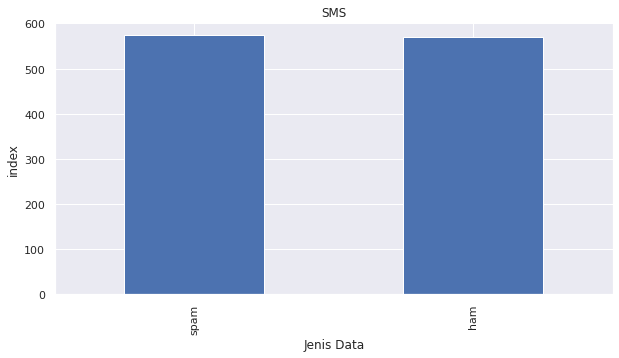

In [ ]:
messages.category.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.xlabel("Jenis Data")
plt.ylabel("index")
plt.title("SMS")
plt.show

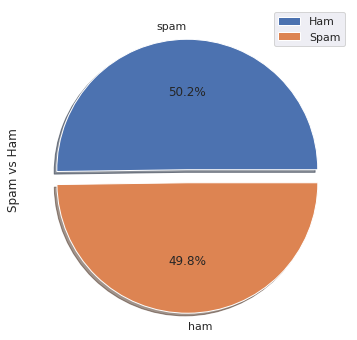

In [ ]:
messages["category"].value_counts().plot(kind = 'pie', 
explode = [0, 0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)

plt.ylabel("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

In [ ]:
topMessages = messages.groupby("text")["category"].agg([len, np.max]).sort_values(by = "len", ascending = False).head(n = 10)
display(topMessages)

,len,amax
text,,
"bebas nama1, terus nanti kalau ada tgl libur, pajuin aja misal jadi kamis atau sabtu.",2,ham
*ngsih bunga ato coklat min,1,ham
"SUPER Wow! Gratis 12 GB buat kamu, ckup dgn isi pulsa minimun Rp 100 Ribu s.d 22 November. Hanya berlaku satu kali kesempatan & berlaku akumulasi loh! TL053C",1,spam
"SMLT_Anda m-ndpt Hadiah TOYOTA ALL New AVANZA, dr TELKOMSELpoin, Pin pemenang anda b89c7h9. U/INFO Lebih lengkap kunjungi: http;//gebyartelkomsel.juplo.com",1,spam
"SLMT!-No Anda M-dpt 1-unit Mobil all New AVANZA,Dari TELKOMSELpoin PIN_pmenan anda b89c7h9)U/info Lengkap kunjungi: www.telkomselpoin-777.pusku.com",1,spam
SLMT!!! NO anda m-dpt mobil AVANZA dr kartu AS. di undi td malam di metro TV PKL 23:00.info.kunjungi almt kami:www.Priode-.webs.com/hub:0016282190254447.TSEL,1,spam
SLMT!!! NO anda m-dpt mobil AVANZA dr kartu AS di undi td malam di metro TV pkl : 23.00 wib u/info klik : www.telkomsell.jimdo atau/Hub : 0016285286552555,1,spam
"SLMT!! No Anda men-dpt hadiah dr:pengundian PT.TELKOMSEL No pin b89c7... Untuk melihat Hadiah Anda, silakan klik : www.telkomselpoin2222.webs.com",1,spam
SIMCARD Anda adalah pemenang Gebyar isi ulang TRI 2015 dengan PIN:7N77F33 lakukan verifikasi sekarang juga hanya di www.idtricare.blogspot.com,1,spam


In [ ]:
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
spam_messages = messages[messages["category"] == "spam"]["text"]
ham_messages = messages[messages["category"] == "ham"]["text"]

spam_words = []
ham_words = []

# Karena ini hanya mengklasifikasikan pesan sebagai spam atau ham, kita dapat menggunakan isalpha().
# Ini juga akan menghapus kata 'tidak/bukan' dalam suatu kata seperti 'tidak bisa' dll.
# Lebih baik digunakan dalam pengaturan analisis sentimen.
# sentence.translate(string.maketrans("", "", ), chars_to_remove)

def extractSpamWords(spamMessages):
    global spam_words
    words = [word.lower() for word in word_tokenize(spamMessages) if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
    spam_words = spam_words + words
    
def extractHamWords(hamMessages):
    global ham_words
    words = [word.lower() for word in word_tokenize(hamMessages) if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
    ham_words = ham_words + words

spam_messages.apply(extractSpamWords)
ham_messages.apply(extractHamWords)

574     None
575     None
576     None
577     None
578     None
        ... 
1138    None
1139    None
1140    None
1141    None
1142    None
Name: text, Length: 569, dtype: object

In [ ]:
from wordcloud import WordCloud

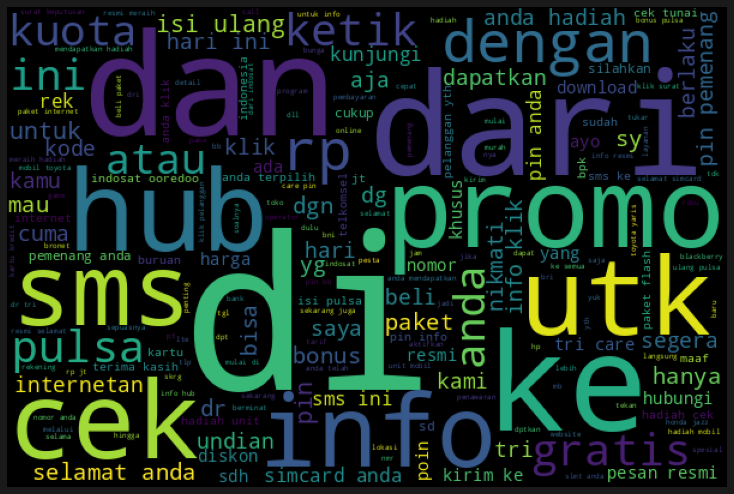

In [ ]:
#Spam Wordcloud

spam_wordcloud = WordCloud(width=600, height=400).generate(" ".join(spam_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

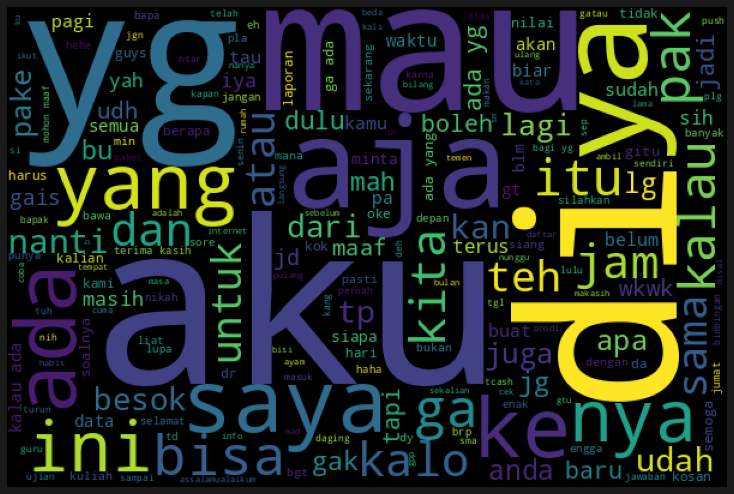

In [ ]:
#Ham Wordcloud

ham_wordcloud = WordCloud(width=600, height=400).generate(" ".join(ham_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
# Menampilkan 10 kata/frasa yang paling sering digunakan pada pesan Spam
spam_words = np.array(spam_words)
print("Top 10 kata/frasa spam :\n")
pd.Series(spam_words).value_counts().head(n = 10)

Top 10 kata/frasa spam :



anda      277
di        261
ke        141
info      133
pin       122
hadiah    119
sms       107
klik      103
ini       100
cek        95
dtype: int64

In [ ]:
# Menampilkan 10 kata/frasa yang paling sering digunakan pada pesan Ham
ham_words = np.array(ham_words)
print("Top 10 kata/frasa ham :\n")
pd.Series(ham_words).value_counts().head(n = 10)

Top 10 kata/frasa ham :



aku     126
di      114
ada     112
yg      108
mau      80
ya       69
aja      69
ke       68
yang     64
saya     61
dtype: int64

In [ ]:
messages["messageLength"] = messages["text"].apply(len)
messages["messageLength"].describe()

count    1143.000000
mean      108.687664
std        59.052112
min        13.000000
25%        58.000000
50%       113.000000
75%       152.000000
max       434.000000
Name: messageLength, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


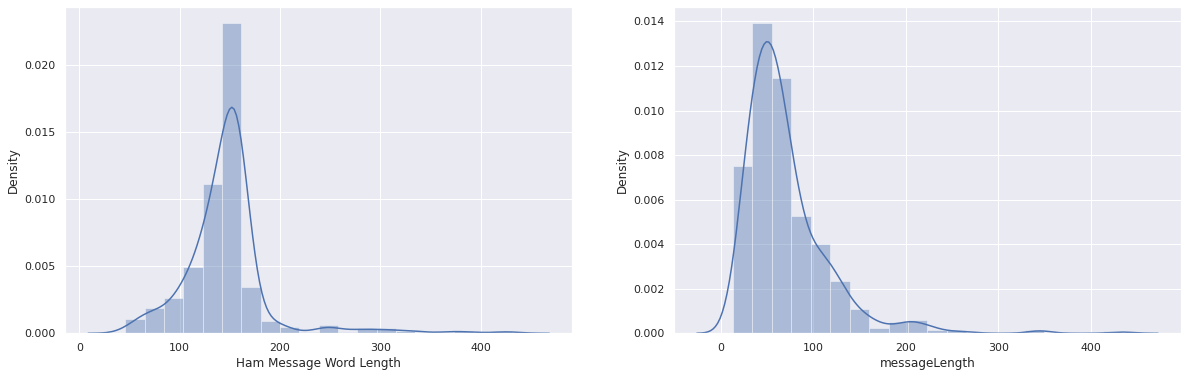

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (20, 6))

sns.distplot(messages[messages["category"] == "spam"]["messageLength"], bins = 20, ax = ax[0])
ax[0].set_xlabel("Spam Message Word Length")

sns.distplot(messages[messages["category"] == "ham"]["messageLength"], bins = 20, ax = ax[1])
ax[0].set_xlabel("Ham Message Word Length")

plt.show()

##PREPROCESSING

###Stopword + Stemming

In [ ]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("english")

def cleanText(message):
    
    message = message.translate(str.maketrans('', '', string.punctuation))
    words = [stemmer.stem(word) for word in message.split() if word.lower() not in stopwords.words("english")]
    
    return " ".join(words)

messages["text"] = messages["text"].apply(cleanText)
messages.head(n = 10)   

,category,text,messageLength
0,spam,promo beli paket flash mulai 1gb di telkomsel ...,152
1,spam,25 gb30 hari hanya rp 35 ribu spesial buat and...,152
2,spam,20160708 114711plg yth sisa kuota flash anda 4...,152
3,spam,20160807 112947plg yth sisa kuota flash anda 7...,153
4,spam,45gb30 hari hanya rp 55 ribu spesial buat anda...,113
5,spam,5 hari lagi ekstra pulsa 50rb dg beli paket in...,153
6,spam,ada ire dgn tarif rp 017hr perpanjangan rp 319...,140
7,spam,akhir bulan harus tetap eksi loh internetan pa...,140
8,spam,aktifkan ire coboy jr terhebat tekan 8087 info...,321
9,spam,ambil bonus harianmu di 600 beba pulsa dptkan ...,114


##KONVERSI MODEL MACHINE LEARNING

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(encoding = "latin-1", strip_accents = "unicode", stop_words = "english")
features = vec.fit_transform(messages["text"])
print(features.shape)

(1143, 5196)


####Model Apllication

In [ ]:
X = messages['text']
y = messages['category']

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

def classify(model, X, y):
    # train test split
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.99, random_state=42, shuffle=True, stratify=y)
    # model training
    pipeline_model = Pipeline([('vect', CountVectorizer()),
                              ('tfidf', TfidfTransformer()),
                              ('clf', model)])
    pipeline_model.fit(x_train, y_train)
    
    print('Accuracy:', pipeline_model.score(x_test, y_test)*100)
    
    #cv_score = cross_val_score(model, X, y, cv=5)
    #print("CV Score:", np.mean(cv_score)*100)
    y_pred = pipeline_model.predict(x_test)
    print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
classify(model, X, y)

Accuracy: 77.47349823321554
              precision    recall  f1-score   support

         ham       0.95      0.58      0.72       564
        spam       0.70      0.97      0.81       568

    accuracy                           0.77      1132
   macro avg       0.82      0.77      0.77      1132
weighted avg       0.82      0.77      0.77      1132



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
%matplotlib inline

cm = confusion_matrix(y_test, y_pred)
print(cm)